In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="../css/custom.css">

# LSTM for human activity recognition


![footer_logo](../images/logo.png)

## Goal

Use an LSTM to classify time series data.

## Program

- [Exploring the dataset]()
- [LSTM Model]()

In [2]:
import os
import shutil
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 15, 6

---
## Exploring the Data

We are going to use an LSTM network for time series to classify movements in the [Human Activity Recognition Using Smartphones Data Set](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).

The movements can be classified in one of the following six categories:
- WALKING,
- WALKING_UPSTAIRS,
- WALKING_DOWNSTAIRS,
- SITTING,
- STANDING,
- LAYING.

This exercise builds on the work from this [LSTM-Human-Activity-Recognition repo](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition/blob/master/README.md).

The [original documentation](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) describes the dataset:

> Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

Load UCI HAR train and test data sets.
`X_train` and `X_test` are already scaled to have zero mean and unit variance.

In [4]:
# Load data. 
data = np.load('../data/UCI_HAR.npz')
X_train, Y_train = data['x_train'], data['y_train']
X_test, Y_test = data['x_test'], data['y_test']

# Gather variables. 
n_train, timesteps, data_dim = X_train.shape
n_classes = Y_train.shape[1]

Before moving on the model let's explore and explain what the dataset actually contains. 

In [5]:
X_train.shape, Y_train.shape

((7352, 128, 9), (7352, 6))

In [12]:
X_train[1].shape

(128, 9)

In [8]:
print(timesteps, data_dim, n_classes)

128 9 6


In [13]:
Y_train[1]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

We see that both `X_train` and `Y_train` have 7352 items in it's first dimension. Each item in this dimension can be interpreted as a sample. 

Each sample in `X_train` consists of readings over time while each sample in the `Y_train` contains the associated label.

The idea is that we have a recurrent neural network glide over each timesample in `X_train`,
- which has 128 ordered readings (a.k.a. 2.56 seconds at 50 FPS),
- of 9 sensor readings (3-axial gyroscope and two 3-axial accelerometers, $ \rightarrow 3*(x, y, z)$

Accelerometer (2x3) and gyroscope (3) = 3x3(x,y,z) = 9
to predict a single label from `Y_train` (which can be one of the 6 classes).

We can make a plot of what this looks like. In the cell below you can select the sample id and view what the data looks like in the `X_train` tensor as well as in the `Y_train` tensor.

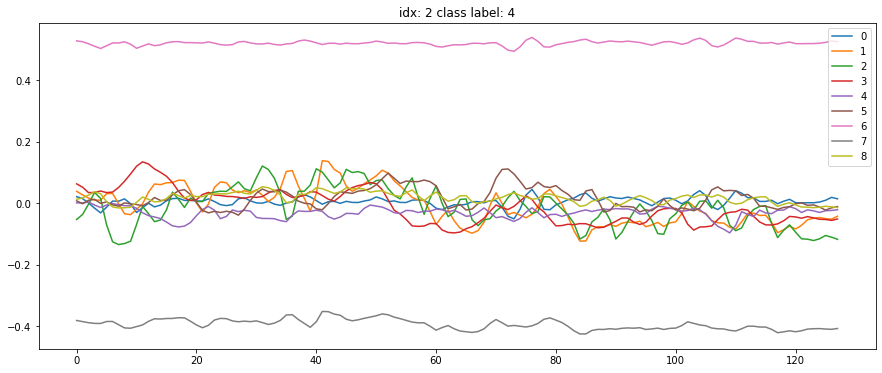

In [22]:
idx = 2
title = f"idx: {idx} class label: {np.argmax(Y_train[idx, :])}"
pd.DataFrame(X_train[idx, :, :]).plot(title=title);

 You'll also notice that sequential slices from `X_train` actually overlap.

![](../images/lstm/overlap-dataset-03-02.png)


In [23]:
for idx in range(100):
    print(f"idx: {idx} class label: {np.argmax(Y_train[idx, :])}")

idx: 0 class label: 4
idx: 1 class label: 4
idx: 2 class label: 4
idx: 3 class label: 4
idx: 4 class label: 4
idx: 5 class label: 4
idx: 6 class label: 4
idx: 7 class label: 4
idx: 8 class label: 4
idx: 9 class label: 4
idx: 10 class label: 4
idx: 11 class label: 4
idx: 12 class label: 4
idx: 13 class label: 4
idx: 14 class label: 4
idx: 15 class label: 4
idx: 16 class label: 4
idx: 17 class label: 4
idx: 18 class label: 4
idx: 19 class label: 4
idx: 20 class label: 4
idx: 21 class label: 4
idx: 22 class label: 4
idx: 23 class label: 4
idx: 24 class label: 4
idx: 25 class label: 4
idx: 26 class label: 4
idx: 27 class label: 3
idx: 28 class label: 3
idx: 29 class label: 3
idx: 30 class label: 3
idx: 31 class label: 3
idx: 32 class label: 3
idx: 33 class label: 3
idx: 34 class label: 3
idx: 35 class label: 3
idx: 36 class label: 3
idx: 37 class label: 3
idx: 38 class label: 3
idx: 39 class label: 3
idx: 40 class label: 3
idx: 41 class label: 3
idx: 42 class label: 3
idx: 43 class label: 

---
## Model

### Exercise: Build LSTM model

<img src="../images/lstm/m_lstm.png" width="500"/>

Implement your own LSTM model based on the TensorFlow model:

> - Train model for 5 - 10 epochs while keeping the best model (save to `model_path`) and using early stopping.
> - Experiment with
>     - a lower batch size
>     - a different optimizer
>     - more hidden nodes
>     - dropout
> - Aim for a test accuracy higher than 90%.
> - Use a vanilla RNN or multiple LSTM layers, can you get similar performance?

In [24]:
import shutil

m2o_dir = os.path.join('../output', "m2o")
if os.path.exists(m2o_dir):
    shutil.rmtree(m2o_dir)
os.makedirs(m2o_dir)

model_path = os.path.join(m2o_dir, "many_to_one.h5")

In [ ]:
from tensorflow.keras.models import Sequential


def make_lstm_model():
    """Function for making an LSTM model"""
    model = Sequential()
    # TODO: fill in
    return model


np.random.seed(707)


In [33]:
# %load ../answers/lstm.py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.models import Sequential


def make_lstm_model():
    model = Sequential()
    model.add(
        LSTM(64, input_shape=(timesteps, data_dim), dropout=0.1, recurrent_dropout=0.1)
    )
    model.add(Dense(n_classes, activation="softmax"))

    return model


np.random.seed(707)

callbacks = [ModelCheckpoint(filepath=model_path, save_best_only=True)]

model = make_lstm_model()
model.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 5
history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(X_test, Y_test),
    callbacks=callbacks,
)


Epoch 1/5
230/230 [==============================] - 18s 72ms/step - loss: 0.6966 - accuracy: 0.7602 - val_loss: 0.4115 - val_accuracy: 0.8724
Epoch 2/5
230/230 [==============================] - 16s 71ms/step - loss: 0.2097 - accuracy: 0.9295 - val_loss: 0.3530 - val_accuracy: 0.8904
Epoch 3/5
230/230 [==============================] - 19s 84ms/step - loss: 0.1855 - accuracy: 0.9297 - val_loss: 0.2831 - val_accuracy: 0.9009
Epoch 4/5
230/230 [==============================] - 19s 84ms/step - loss: 0.1508 - accuracy: 0.9423 - val_loss: 0.2880 - val_accuracy: 0.8972
Epoch 5/5
230/230 [==============================] - 20s 86ms/step - loss: 0.1323 - accuracy: 0.9441 - val_loss: 0.3065 - val_accuracy: 0.8935


Load the best model and get predictions:

In [34]:
best_model = make_lstm_model()
best_model.load_weights(model_path)

probabilities = best_model.predict(X_test)
prediction = best_model.predict(X_test).argmax(axis=1)

class_labels = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING",
]


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.models import Sequential


def make_lstm_model():
    model = Sequential()
    model.add(
        SimpleRNN(64, input_shape=(timesteps, data_dim), dropout=0.1, recurrent_dropout=0.1)
    )
    model.add(Dense(n_classes, activation="softmax"))

    return model


np.random.seed(707)

callbacks = [ModelCheckpoint(filepath=model_path, save_best_only=True), EarlyStopping()]

model = make_lstm_model()
model.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 5
history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(X_test, Y_test),
    callbacks=callbacks,
)



Epoch 1/5
230/230 [==============================] - 6s 21ms/step - loss: 1.0079 - accuracy: 0.5805 - val_loss: 0.7976 - val_accuracy: 0.6356
Epoch 2/5
230/230 [==============================] - 5s 20ms/step - loss: 0.6747 - accuracy: 0.6976 - val_loss: 0.7653 - val_accuracy: 0.6871


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.models import Sequential


def make_lstm_model():
    model = Sequential()
    model.add(
        LSTM(64, input_shape=(timesteps, data_dim), dropout=0.1, recurrent_dropout=0.1, return_sequences=True)
    )
    model.add(
        LSTM(32, dropout=0.1, recurrent_dropout=0.1)
    )
    model.add(Dense(n_classes, activation="softmax"))

    return model


np.random.seed(707)

callbacks = [ModelCheckpoint(filepath=model_path, save_best_only=True), EarlyStopping(verbose=1, patience=1)]

model = make_lstm_model()
model.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 5
history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(X_test, Y_test),
    callbacks=callbacks,
)

Epoch 1/5
230/230 [==============================] - 37s 148ms/step - loss: 0.5906 - accuracy: 0.7859 - val_loss: 0.3339 - val_accuracy: 0.8833
Epoch 2/5
230/230 [==============================] - 33s 146ms/step - loss: 0.2070 - accuracy: 0.9301 - val_loss: 0.2629 - val_accuracy: 0.9087
Epoch 3/5
230/230 [==============================] - 35s 154ms/step - loss: 0.1291 - accuracy: 0.9525 - val_loss: 0.2900 - val_accuracy: 0.9101
Epoch 00003: early stopping


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_classification(truth, prediction, labels=None):
    # normalized confusion matrix
    truth = truth.argmax(axis=1)
    cm = confusion_matrix(truth, prediction)
    normalised_cm = np.array(cm, dtype=np.float32) / np.sum(cm) * 100

    # show cm matrix accuracy in title
    f, ax = plt.subplots(figsize=(6, 6))
    cax = ax.imshow(normalised_cm, interpolation="nearest", cmap=plt.cm.rainbow)
    f.colorbar(cax)
    ax.set_title(
        "normalised confusion matrix\n{0:.2f}% overall accuracy".format(
            accuracy_score(truth, prediction) * 100
        ),
        fontsize=16,
    )
    ax.grid(False)
    if labels is not None:
        tick_marks = np.arange(len(labels))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(labels, rotation=90)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(labels)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    return ax

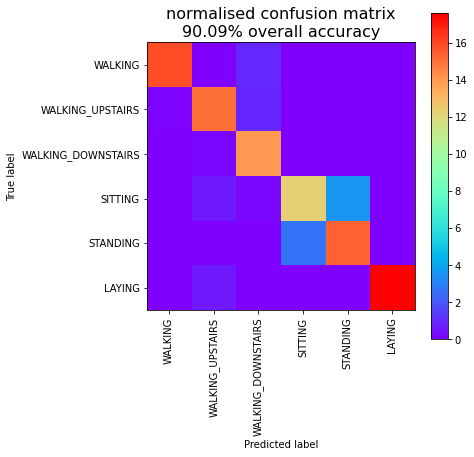

In [35]:
plot_classification(Y_test, prediction, class_labels);

---
## Conclusion

We've implemented a deep network to recognize human activities.
Using multi-dimentional time-features in prediction can be quite challenging, but was a breeze using Keras.
Keras also used us to refactor quite lenghty TensorFlow code into only a few commands!

In [ ]:
shutil.rmtree('../output')